**In this notebook, I illustrate the basic working of sunbather for a constant composition atmosphere**

In [1]:
import sys
sys.path.append('/home/raghav/sunbather/src/') #add your path to /sunbather/src/ here

import tools
import RT
import construct_parker as cp
import convergeT_parker as cT
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/raghav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/raghav/.local/lib/python3.10/site-packages/p_winds/tools.py:24: UserWarning: Environment variable PWINDS_REFSPEC_DIR is not set.
  warn("Environment variable PWINDS_REFSPEC_DIR is not set.")


**Creating a basic simulation**

In [2]:
planet = tools.Planet("HD189733b")
T = 10014
Mdot = 9.752
solar_ab = tools.Abundances()
pdir = 'solar'

In [3]:
cp.save_cloudy_parker_profile(planet,Mdot,T,solar_ab,pdir,overwrite=False)
cT.run_s('HD189733b',Mdot,T,1,1.1,'solar','real',overwrite=False,startT='nearby',pdir=pdir,abundances=solar_ab,save_sp=tools.get_specieslist())

Parker profile already exists and overwrite = False: HD189733b solar 9.752 10014
Simulation already exists and overwrite = False: HD189733b solar 9.752 10014


**Accessing the simulation and plotting profiles / spectra**

In [4]:
HD189733b_solar_sim = tools.Sim("/home/raghav/project_sb/sims/1D/HD189733b/solar/parker_10014_9.752/converged")
HD189733b_solar_parker = HD189733b_solar_sim.par

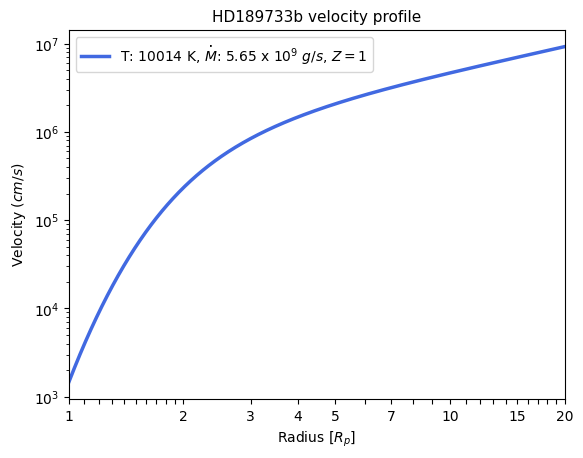

In [6]:
parkerfig, ax = plt.subplots(1)
ax.plot(HD189733b_solar_parker.prof.alt.values / HD189733b_solar_parker.prof.alt.values[0], HD189733b_solar_parker.prof.v.values, label=r'T: 10014 K, $\overset{\boldsymbol{\cdot}}{M}$: $5.65$ x $10^9 $ $g/s$, $Z=1$', color='royalblue', linewidth=2.5)
tools.set_alt_ax(ax, altmax=20)
ax.set_ylabel('Velocity ($cm/s$)')
ax.set_yscale('log')
ax.set_title('HD189733b velocity profile', size=11)
ax.legend()
#plt.savefig('HD189733b_velprof.png', dpi=400, bbox_inches='tight')
plt.show()

**NUV Transmission spectra**

In [7]:
wavs = RT.constantR_wavs(2000,3000,100000)
all_species = tools.get_specieslist(max_ion=2)
transit_spectrum_solar, _, _ = RT.FinFout(HD189733b_solar_sim, wavs, all_species) #do RT

/home/raghav/sunbather/src/RT.py:505: UserWarning: Your requested species Ti is not resolved into multiple energy levels by Cloudy. I will make the spectrum assuming all Ti is in the ground-state.
  warnings.warn(f"Your requested species {spec} is not resolved into multiple energy levels by Cloudy. " + \
/home/raghav/sunbather/src/RT.py:505: UserWarning: Your requested species Ti+ is not resolved into multiple energy levels by Cloudy. I will make the spectrum assuming all Ti+ is in the ground-state.
  warnings.warn(f"Your requested species {spec} is not resolved into multiple energy levels by Cloudy. " + \
/home/raghav/sunbather/src/RT.py:505: UserWarning: Your requested species V is not resolved into multiple energy levels by Cloudy. I will make the spectrum assuming all V is in the ground-state.
  warnings.warn(f"Your requested species {spec} is not resolved into multiple energy levels by Cloudy. " + \
/home/raghav/sunbather/src/RT.py:505: UserWarning: Your requested species V+ is no

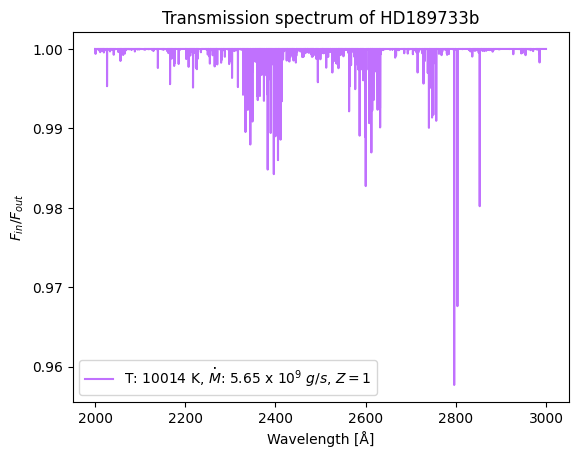

In [10]:
fig, ax = plt.subplots(1)
ax.plot(wavs, transit_spectrum_solar / transit_spectrum_solar[0], label=r'T: 10014 K, $\overset{\boldsymbol{\cdot}}{M}$: $5.65$ x $10^9 $ $g/s$, $Z=1$', color='xkcd:easter purple')
ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel(r'$F_{in} / F_{out}$')
ax.set_title(r'Transmission spectrum of HD189733b')
ax.legend()
#plt.savefig('HD189733b_NUVSpectrum.png', dpi=400, bbox_inches='tight')
plt.show()

In [11]:
wavs2 = RT.constantR_wavs(2795, 2805, 100000) #set up a wav-grid around the Mg II doublet
transit_spectrum_solar_Mg, _, _ = RT.FinFout(HD189733b_solar_sim, wavs2, 'Mg+', width_fac=20.) #do RT

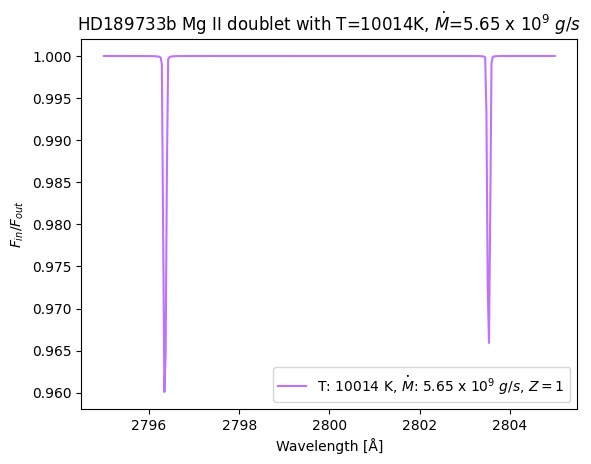

In [15]:
fig, ax = plt.subplots(1)
ax.plot(wavs2, transit_spectrum_solar_Mg / transit_spectrum_solar_Mg[0], label=r'T: 10014 K, $\overset{\boldsymbol{\cdot}}{M}$: $5.65$ x $10^9 $ $g/s$, $Z=1$', color='xkcd:easter purple')
ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel(r'$F_{in} / F_{out}$')
ax.set_title(r'HD189733b Mg II doublet with T=10014K, $\dot{M}$=$5.65$ x $10^{9}$ $g/s$')
ax.legend()
#plt.savefig('Methods_MgSpectrum.png', dpi=400)
plt.show()